In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.optimize as optimization
import datetime

In [2]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
NUM_PORTFOLIOS = 10000
NUM_TRADING_DAYS = 252

In [3]:
start_date = '2012-01-01'
end_date = '2017-01-01'

In [4]:
def download_data():
    # name of the stock (key) - stock values (2010-date) as the values
    stock_data = {}
    for stock in stocks:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
    return pd.DataFrame(stock_data)

In [19]:
download_data()

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2012-01-03 00:00:00-05:00,12.402624,15.332818,1.872000,68.375793,8.951500,30.526325
2012-01-04 00:00:00-05:00,12.469279,15.175243,1.847333,69.120621,8.875500,29.606630
2012-01-05 00:00:00-05:00,12.607715,15.101537,1.808000,69.083389,8.880500,27.767229
2012-01-06 00:00:00-05:00,12.739511,14.994799,1.794000,69.455803,9.130500,26.257395
2012-01-09 00:00:00-05:00,12.719305,15.040545,1.816667,70.237854,8.928000,25.782213
...,...,...,...,...,...,...
2016-12-23 00:00:00-05:00,27.007311,20.115482,14.222667,140.458664,38.029499,16.517509
2016-12-27 00:00:00-05:00,27.178825,20.161764,14.635333,140.546738,38.570000,16.286993
2016-12-28 00:00:00-05:00,27.062933,20.048948,14.649333,139.665588,38.606499,15.888018


In [5]:
def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

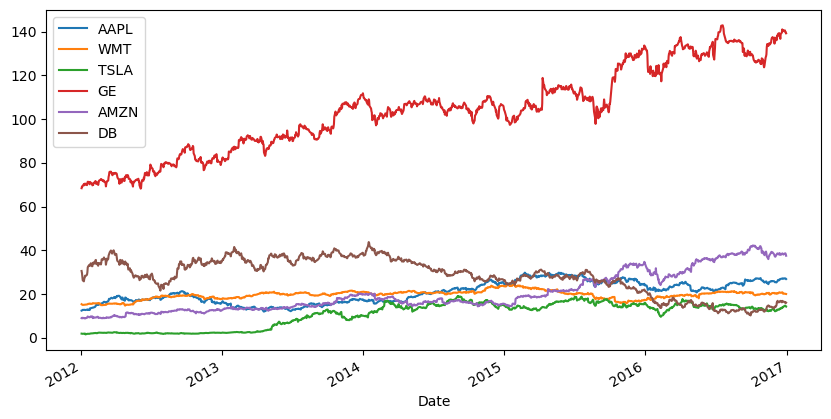

In [6]:
show_data(download_data())

In [7]:
def calculate_return(data):
    log_return = np.log(data/data.shift(1))
    return log_return[1:]

In [8]:
def show_statistics(returns):
    print(returns.mean() * NUM_TRADING_DAYS)
    print(returns.cov() * NUM_TRADING_DAYS)

In [9]:
def show_mean_variance(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(weights.T, np.dot(returns.cov()))
    
    print('Expected portfolio mean (return): ', portfolio_return)
    print('Expected portfolio volatility (standard deviation): ', portfolio_volatility)

In [10]:
def generate_portfolios(returns):
    portfolio_means = []
    portfolio_risks = []
    portfolio_weights = []
    for _ in range(NUM_PORTFOLIOS):
        w = np.random.random(len(stocks))
        w /= np.sum(w)
        portfolio_weights.append(w)
        portfolio_means.append(np.sum(returns.mean()*w) * NUM_TRADING_DAYS)
        portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() *NUM_TRADING_DAYS, w))))
    
    return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)

In [11]:
def show_portfolios(returns, volatilities):
    plt.figure(figsize=(10, 6))
    plt.scatter(volatilities, returns, c=returns/volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')

In [12]:
def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
    
    return np.array([portfolio_return, portfolio_volatility, portfolio_return / portfolio_volatility])

In [13]:
def min_function_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [14]:
def optimize_portfolio(weights, returns):
    # the sum of the weights is 1
    constraints = {'type':'eq', 'fun': lambda x: np.sum(x)-1}
    bounds = tuple((0, 1) for _ in range(len(stocks)))
    return optimization.minimize(fun=min_function_sharpe, x0=weights[0], args=returns, method='SLSQP', bounds=bounds, constraints=constraints)

In [15]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal porfolio: ", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe ratio: ",
          statistics(optimum['x'].round(3), returns))

In [16]:
def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_vols, portfolio_rets, c=portfolio_rets/portfolio_vols, marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(opt['x'], rets)[1], statistics(optimum['x'], rets)[0], 'g*', markersize=20)
    plt.show()

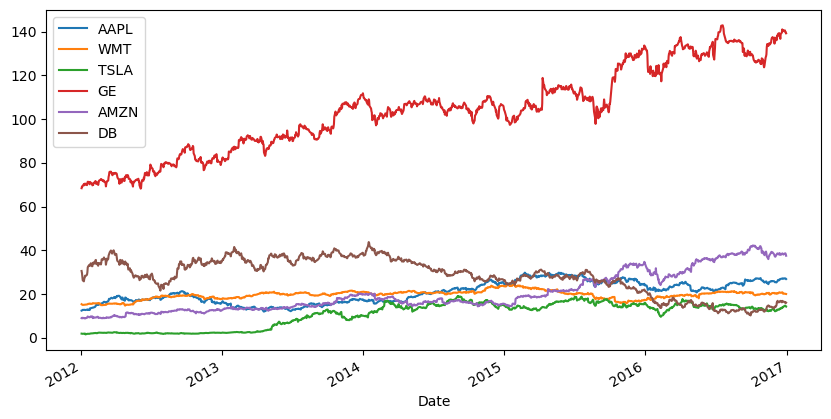

                               AAPL       WMT      TSLA        GE      AMZN  \
Date                                                                          
2012-01-04 00:00:00-05:00  0.005360 -0.010330 -0.013264  0.010834 -0.008526   
2012-01-05 00:00:00-05:00  0.011041 -0.004869 -0.021522 -0.000539  0.000563   
2012-01-06 00:00:00-05:00  0.010399 -0.007093 -0.007773  0.005376  0.027763   
2012-01-09 00:00:00-05:00 -0.001587  0.003046  0.012556  0.011197 -0.022428   
2012-01-10 00:00:00-05:00  0.003574 -0.002369  0.013486 -0.007450  0.004359   
...                             ...       ...       ...       ...       ...   
2016-12-23 00:00:00-05:00  0.001976 -0.000719  0.023188  0.001884 -0.007532   
2016-12-27 00:00:00-05:00  0.006331  0.002298  0.028602  0.000627  0.014113   
2016-12-28 00:00:00-05:00 -0.004273 -0.005611  0.000956 -0.006289  0.000946   
2016-12-29 00:00:00-05:00 -0.000257 -0.000722 -0.023296  0.000316 -0.009081   
2016-12-30 00:00:00-05:00 -0.007826 -0.002023 -0.004

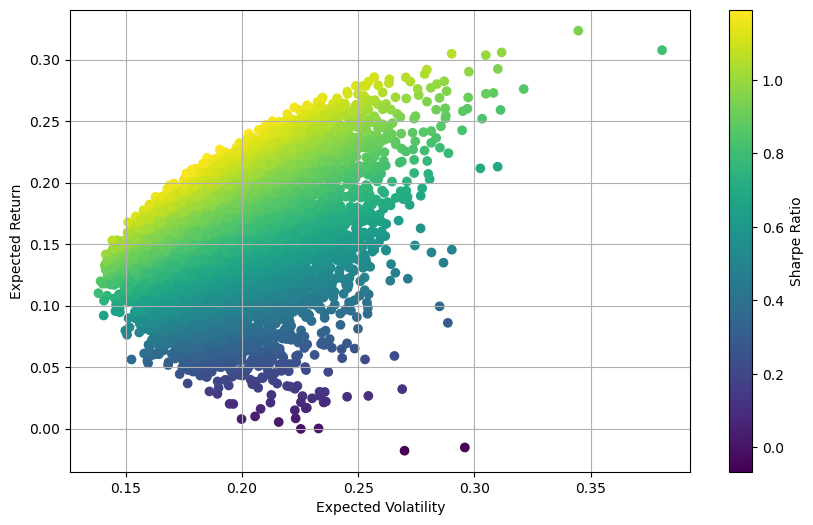

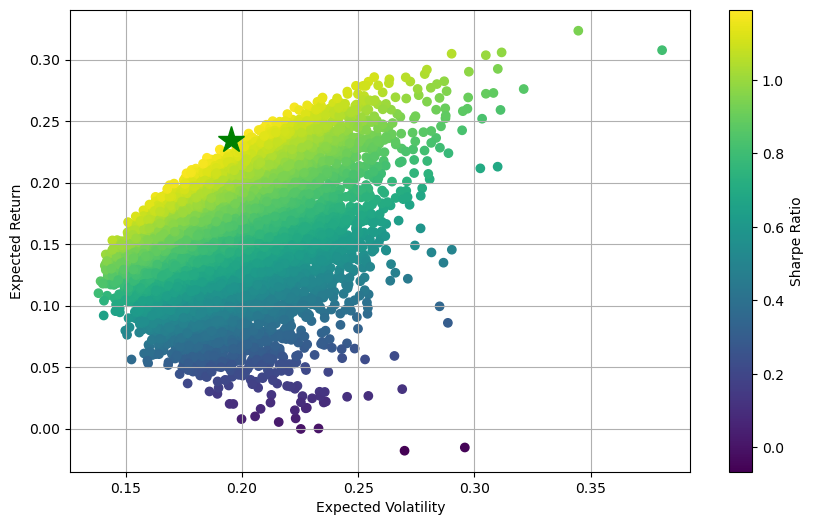

In [17]:
dataset = download_data()
show_data(dataset)
log_daily_returns = calculate_return(dataset)
print(log_daily_returns)
show_statistics(log_daily_returns)

pweights, means, risks =  generate_portfolios(log_daily_returns)
show_portfolios(means, risks)
optimum = optimize_portfolio(pweights, log_daily_returns)
print_optimal_portfolio(optimum, log_daily_returns)
show_optimal_portfolio(optimum, log_daily_returns, means, risks)

In [18]:
log_daily_returns

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2012-01-04 00:00:00-05:00,0.005360,-0.010330,-0.013264,0.010834,-0.008526,-0.030591
2012-01-05 00:00:00-05:00,0.011041,-0.004869,-0.021522,-0.000539,0.000563,-0.064142
2012-01-06 00:00:00-05:00,0.010399,-0.007093,-0.007773,0.005376,0.027763,-0.055909
2012-01-09 00:00:00-05:00,-0.001587,0.003046,0.012556,0.011197,-0.022428,-0.018263
2012-01-10 00:00:00-05:00,0.003574,-0.002369,0.013486,-0.007450,0.004359,0.044478
...,...,...,...,...,...,...
2016-12-23 00:00:00-05:00,0.001976,-0.000719,0.023188,0.001884,-0.007532,0.004843
2016-12-27 00:00:00-05:00,0.006331,0.002298,0.028602,0.000627,0.014113,-0.014054
2016-12-28 00:00:00-05:00,-0.004273,-0.005611,0.000956,-0.006289,0.000946,-0.024802
